In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



In [13]:
# lectura del conjunto de datos MNIST, los dato de entrenamiento y prueba y aestan separados
#Lectura del conjunto de datos MNIST, los datos de entrenamiento y prueba ya estan separados
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28 * 28)
y_train = to_categorical(y_train, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28)
y_test = to_categorical(y_test, num_classes=10)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (60000, 784)
Forma de y_train: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


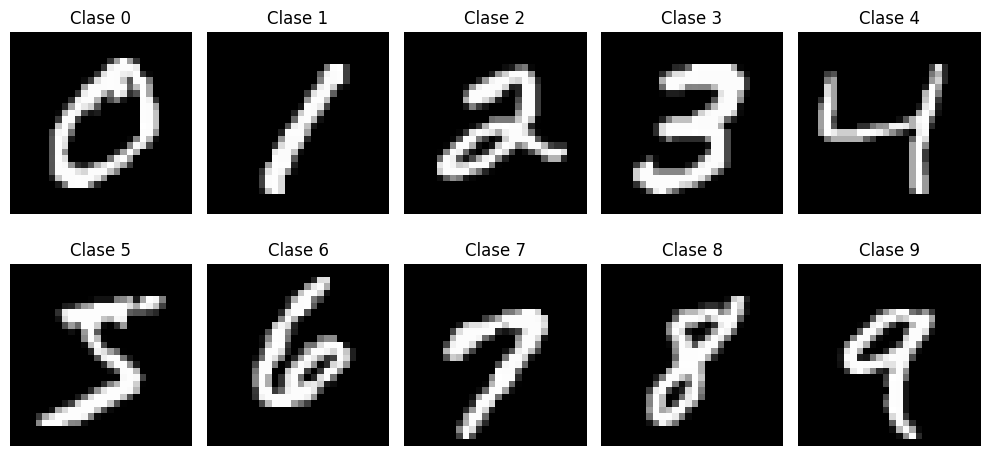

In [15]:
#Muestra una imagen de cda categoria
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_train[y_train[:, i] == 1][0].reshape(28, 28), cmap='gray')
    ax.set_title(f'Clase {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [20]:
#Define la funcion que crea el modelo MLP con keras
def create_mlp(input_dim, num_classes):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [22]:
#Entrena un modelo con los datos de entrenamiento
model = create_mlp(input_dim=28*28, num_classes=10)
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.2695 - val_accuracy: 0.9556 - val_loss: 0.1468
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.2695 - val_accuracy: 0.9556 - val_loss: 0.1468
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.1124 - val_accuracy: 0.9676 - val_loss: 0.1045
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.1124 - val_accuracy: 0.9676 - val_loss: 0.1045
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0762 - val_accuracy: 0.9704 - val_loss: 0.0929
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0762 - val_accuracy: 0.9704 - val_loss: 0.0929
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0581 - val_accuracy: 0.9729 - val_loss: 0.0913
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0581 - 